In [2]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\anaji\Sowjanya\Lms task folder\movie_data\movies.csv")

In [5]:
df.shape

(9742, 3)

In [6]:
ratings = pd.read_csv(r"C:\Users\anaji\Sowjanya\Lms task folder\movie_data\ratings.csv")

In [41]:
ratings.shape

(100836, 4)

How many unique "userId" are available in "ratings.csv"?


In [7]:
ratings['userId'].nunique()

610

Which movie has recieved maximum number of user ratings?


In [45]:
ra=df.merge(ratings, how='outer', on='movieId')

In [47]:
radf = pd.DataFrame(ra.groupby('title')['rating'].count())
radf.sort_values('rating')

,rating
title,
"Chosen, The (1981)",0
I Know Where I'm Going! (1945),0
Mutiny on the Bounty (1962),0
Twentieth Century (1934),0
Chalet Girl (2011),0
...,...
"Matrix, The (1999)",278
"Silence of the Lambs, The (1991)",279
Pulp Fiction (1994),307


Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [8]:
tags = pd.read_csv(r"C:\Users\anaji\Sowjanya\Lms task folder\movie_data\tags.csv")

In [9]:
am = df.merge(tags, how='outer', on='movieId')

In [10]:
am[am['title']=='Matrix, The (1999)']

,movieId,title,genres,userId,tag,timestamp
2674,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424.0,martial arts,1.457843e+09
2675,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,424.0,sci-fi,1.457843e+09
2676,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,474.0,alternate universe,1.137205e+09
2677,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537.0,philosophy,1.424141e+09
2678,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,537.0,post apocalyptic,1.424141e+09


What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [13]:
ra[ra['title']=='Terminator 2: Judgment Day (1991)'].rating.mean()

3.970982142857143

How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

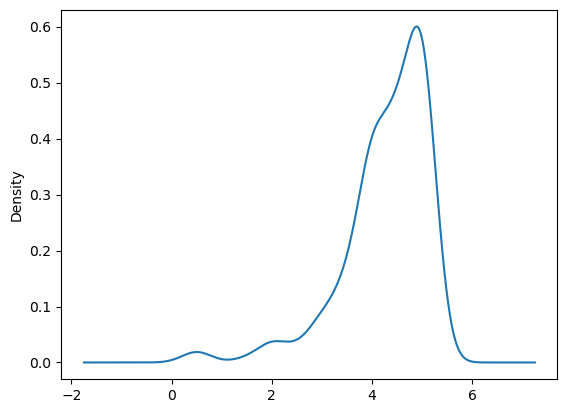

In [14]:
ra[ra['title']=='Fight Club (1999)'].rating.plot(kind='kde')



Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [18]:
inne = df.merge(ra, how='inner', on='movieId')

In [19]:
inne['rating'].count()

100836

In [20]:
# Group user ratings by movieId and calculate count and mean
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

In [43]:
grouped_ratings

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [22]:
mr = df.merge(grouped_ratings, on='movieId')

In [23]:
mr

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49,3.071429
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1,4.000000
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1,3.500000
9721,193585,Flint (2017),Drama,1,3.500000
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,1,3.500000


In [26]:
fil = mr[mr['count']>50]

In [27]:
fil

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [28]:
filtered = fil.merge(ratings, on='movieId')

In [29]:
filtered.groupby('movieId')['rating'].agg('mean').max()

4.429022082018927

filtered['movieId'].nunique()

Which movie is the most popular based on  average user ratings?

In [31]:
rat = pd.crosstab(filtered['title'],filtered['rating'], values=filtered['rating'], aggfunc='mean')

In [32]:
average_ratings = filtered.groupby('title')['rating'].mean().reset_index()


In [33]:
average_ratings.sort_values(by='rating')

,title,rating
426,Wild Wild West (1999),2.207547
104,Coneheads (1993),2.420635
94,City Slickers II: The Legend of Curly's Gold (...,2.645455
222,Judge Dredd (1995),2.669355
221,Johnny Mnemonic (1995),2.679245
...,...,...
131,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041
107,Cool Hand Luke (1967),4.271930
151,Fight Club (1999),4.272936
170,"Godfather, The (1972)",4.289062


Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [34]:
fil.sort_values(by='count')

,movieId,title,genres,count,mean
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098
915,1215,Army of Darkness (1993),Action|Adventure|Comedy|Fantasy|Horror,51,4.039216
1562,2100,Splash (1984),Comedy|Fantasy|Romance,51,3.117647
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
...,...,...,...,...,...
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022


Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [50]:
fil[fil['genres'].str.contains('Sci-Fi')].sort_values('count')


,movieId,title,genres,count,mean
6192,45499,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,52,3.355769
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
...,...,...,...,...,...
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076


You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [35]:
tag = df.merge(tags, how='inner', on='movieId')

In [36]:
t = pd.crosstab(tag['title'],tag['tag'])

In [38]:
links = pd.read_csv(r"C:\Users\anaji\Sowjanya\Lms task folder\movie_data\links.csv")

In [54]:
fil.merge(links, how='inner', on='movieId').sort_values('mean')

,movieId,title,genres,count,mean,imdbId,tmdbId
260,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547,120891,8487.0
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0
71,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455,109439,11310.0
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0
...,...,...,...,...,...,...,...
111,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041,57012,935.0
169,1276,Cool Hand Luke (1967),Drama,57,4.271930,61512,903.0
273,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936,137523,550.0
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0


Mention the movieId of the movie which has the highest IMDB rating.

In [51]:
import requests
import numpy as np
from bs4 import BeautifulSoup

In [55]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt%7Bnew_id%7D/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : "sc-bde20123-1 cMEQkK"})
    return imdb_rating.text if imdb_rating else np.nan